In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
data = pd.read_excel('data_analysis/brinquedos-para-gatos-a1.xlsx')

In [4]:
data.columns = ['month', 'sales']
data

,month,sales
0,2013-01-01,13
1,2013-02-01,19
2,2013-03-01,30
3,2013-04-01,25
4,2013-05-01,31
5,2013-06-01,37
6,2013-07-01,63
7,2013-08-01,56
8,2013-09-01,53
9,2013-10-01,59


In [5]:
data['aux'] = range(len(data))

In [6]:
data

,month,sales,aux
0,2013-01-01,13,0
1,2013-02-01,19,1
2,2013-03-01,30,2
3,2013-04-01,25,3
4,2013-05-01,31,4
5,2013-06-01,37,5
6,2013-07-01,63,6
7,2013-08-01,56,7
8,2013-09-01,53,8
9,2013-10-01,59,9


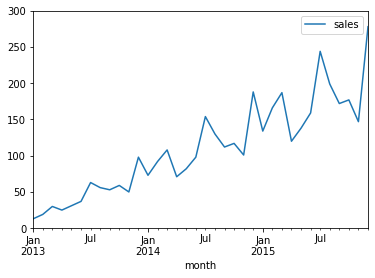

In [7]:
data.plot(x='month', y='sales', ylim=(0, 300))

In [8]:
data_2013 = data[data['month'].dt.year == 2013]
data_2013.index = range(len(data_2013))

In [9]:
data_2014 = data[data['month'].dt.year == 2014]
data_2014.index = range(len(data_2014))

In [10]:
data_2015 = data[data['month'].dt.year == 2015]
data_2015.index = range(len(data_2015))

In [11]:
data_per_year = pd.DataFrame({'2013': data_2013.sales, '2014': data_2014.sales, '2015': data_2015.sales})
data_per_year

,2013,2014,2015
0,13,73,134
1,19,92,166
2,30,108,187
3,25,71,120
4,31,82,138
5,37,98,159
6,63,154,244
7,56,130,199
8,53,112,172
9,59,117,177


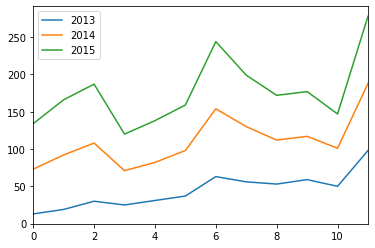

In [12]:
data_per_year.plot()

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
data.head()

,month,sales,aux
0,2013-01-01,13,0
1,2013-02-01,19,1
2,2013-03-01,30,2
3,2013-04-01,25,3
4,2013-05-01,31,4


In [15]:
model = LinearRegression()

In [16]:
X = pd.DataFrame(data['aux'])

In [17]:
Y = pd.DataFrame(data['sales'])

In [18]:
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_predict = model.predict(X)

In [20]:
data['trend'] = y_predict

In [21]:
data.head()

,month,sales,aux,trend
0,2013-01-01,13,0,12.765766
1,2013-02-01,19,1,18.355341
2,2013-03-01,30,2,23.944916
3,2013-04-01,25,3,29.534492
4,2013-05-01,31,4,35.124067


In [22]:
import seaborn as sns

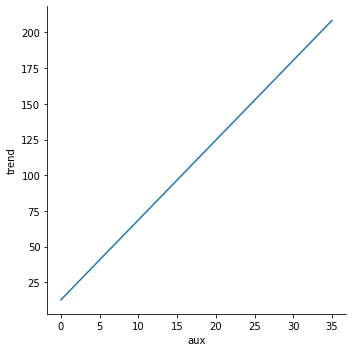

In [23]:
sns.relplot(x='aux', y='trend', data=data, kind='line')

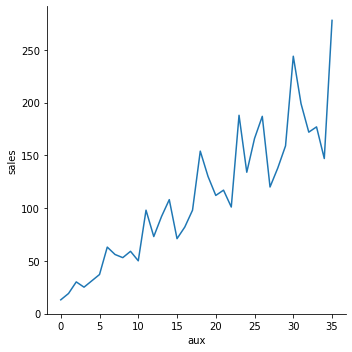

In [24]:
sns.relplot(x='aux', y='sales', data=data, kind='line')

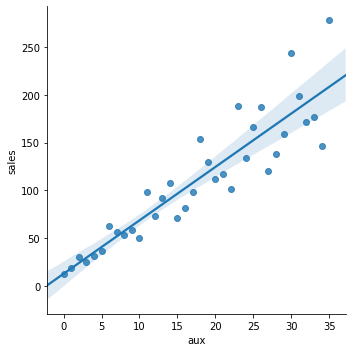

In [25]:
sns.lmplot(x='aux', y='sales', data=data)